In [186]:
import numpy as np
import pandas as pd
import string
import nltk
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.probability import FreqDist
from sklearn.cluster import KMeans, MiniBatchKMeans
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.preprocessing import normalize
from sklearn.metrics import pairwise_distances
import matplotlib
from matplotlib import pyplot as plt
from gensim.parsing.preprocessing import STOPWORDS
from gensim import corpora
from gensim.models import LsiModel
from gensim.models.coherencemodel import CoherenceModel
from gensim.models.ldamodel import LdaModel

In [4]:
# twitter
import tweepy
consumer_key = 'QmZx3V0FM58W9JEm8JmU4ekv6'
consumer_secret = 'v2qj2zJEMs2mqwGhQWHfawVcwF6Ev0j4HAcSyaHhUSI1nvEVhr'
access_token = '1259311966088298496-DuC3tPI05qBgCN6yQjPeAIbnHtfUkV'
access_token_secret = 'r7Yrm0XfVdgyOepnkwQGk6cqtFsOIWcuXR1zKisNyosLH'

In [414]:
def get_tweets(search_term,consumer_key=consumer_key,consumer_secret=consumer_secret,
               access_token=access_token,access_token_secret=access_token_secret):
    tweet_df = []
    search_term = search_term + " -filter:retweets"
    import tweepy
    auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
    auth.set_access_token(access_token, access_token_secret)
    api = tweepy.API(auth)
    last_id = None
    results = True
    try:
        while results:
            results = api.search(q = search_term, lang = "en", result_type = "recent", count = 100, tweet_mode='extended', max_id = last_id)
            if not results:
                break
            last_id = results[-1]._json['id'] - 1
            for i in range(len(results)):
                tweet_df.append([results[i]._json['created_at'], results[i]._json['user']['description'], results[i]._json['full_text']])
        tweet_df = pd.DataFrame(tweet_df, columns = ['date', 'description', 'text'])
        return tweet_df
    except:
        print('exceed request')
        return tweet_df

In [421]:
# webscrape woman skincare
tweet_df = get_tweets(search_term = "skincare woman")
tweet_df

,date,description,text
0,Thu Jun 11 05:46:14 +0000 2020,A mermaid on land .,@pocahontass_11 Nightly skincare routines &gt;...
1,Thu Jun 11 05:27:38 +0000 2020,"artíst, comedian, therapist, photographer, nai...",@worded_woman It’s goinnn just did my skincare...
2,Thu Jun 11 03:42:46 +0000 2020,"Phân phối mỹ phẩm Quốc tế chính hãng, chất lượ...",Women's most powerful weapon is beauty.\n#luxu...
3,Thu Jun 11 03:36:09 +0000 2020,Giving women moments to celebrate every day. ...,Have you thought of #Peptides in your #SkinCar...
4,Thu Jun 11 03:25:14 +0000 2020,Công ty TNHH Dermacol Viet Nam - Được Uỷ quyền...,Women's most powerful weapon is beauty.\n#derm...
...,...,...,...
119,Wed Jun 03 15:46:34 +0000 2020,Founder of Nicole Bryl Skincare - handcrafted ...,#nicolebrylskincare #4minutetreatment is excel...
120,Wed Jun 03 13:26:26 +0000 2020,देश और समाज के लिए जो भी हो सके करने का संकल्प।,The Journey from a Biotechnologist to an Entre...
121,Wed Jun 03 12:06:10 +0000 2020,Reenbeenthequeen The Body Waxing Machine 👑\n\n...,My tip of the day quotes promote awareness to ...
122,Wed Jun 03 11:42:24 +0000 2020,BJP worker...since 1984...,The Journey from a Biotechnologist to an Entre...


In [146]:
tweet_df = pd.DataFrame(tweet_df, columns = ['date', 'description', 'text'])
tweet_df

,date,description,text
0,Wed Jun 10 22:07:39 +0000 2020,18+ only | celestial slut | absolute trashfire...,Skincare tip: get a hydradermabrasian facial! ...
1,Wed Jun 10 21:11:00 +0000 2020,💔Protest until the tears and screams subside a...,I just purchased Clinique middle age woman ant...
2,Wed Jun 10 21:02:10 +0000 2020,"Neora International Independent Brand Partner,...",They say you can tell a woman’s age by her nec...
3,Wed Jun 10 20:06:49 +0000 2020,Ceo of Onaturell Loves Traveling #34 Organic C...,A skincare company on Ig posted a picture of a...
4,Wed Jun 10 19:53:33 +0000 2020,"whoadette⚜️if I make it to heaven, I hope it c...",I got $55 on skincare for a Black Woman to spe...
...,...,...,...
124,Tue Jun 02 23:29:18 +0000 2020,All natural skincare dedicated to turning skin...,@jackieaina @MoussouBeauty is an all natural s...
125,Tue Jun 02 22:38:05 +0000 2020,just a girl with a big fro living life,@nyjats @jadenhossler shea moisture a great co...
126,Tue Jun 02 22:12:30 +0000 2020,Scientist. Writer. Sherlockian. Mom. Wife. Mor...,@Alythuh @JardimEscondido Black woman owned sk...
127,Tue Jun 02 21:31:17 +0000 2020,I'm extra af | UTSA21 | SC-yungxnaps713,Epara skincare is literally about enveloping y...


In [147]:
unique_tweet_df = tweet_df.drop_duplicates(subset=['text'])
unique_tweet_df

,date,description,text
0,Wed Jun 10 22:07:39 +0000 2020,18+ only | celestial slut | absolute trashfire...,Skincare tip: get a hydradermabrasian facial! ...
1,Wed Jun 10 21:11:00 +0000 2020,💔Protest until the tears and screams subside a...,I just purchased Clinique middle age woman ant...
2,Wed Jun 10 21:02:10 +0000 2020,"Neora International Independent Brand Partner,...",They say you can tell a woman’s age by her nec...
3,Wed Jun 10 20:06:49 +0000 2020,Ceo of Onaturell Loves Traveling #34 Organic C...,A skincare company on Ig posted a picture of a...
4,Wed Jun 10 19:53:33 +0000 2020,"whoadette⚜️if I make it to heaven, I hope it c...",I got $55 on skincare for a Black Woman to spe...
...,...,...,...
124,Tue Jun 02 23:29:18 +0000 2020,All natural skincare dedicated to turning skin...,@jackieaina @MoussouBeauty is an all natural s...
125,Tue Jun 02 22:38:05 +0000 2020,just a girl with a big fro living life,@nyjats @jadenhossler shea moisture a great co...
126,Tue Jun 02 22:12:30 +0000 2020,Scientist. Writer. Sherlockian. Mom. Wife. Mor...,@Alythuh @JardimEscondido Black woman owned sk...
127,Tue Jun 02 21:31:17 +0000 2020,I'm extra af | UTSA21 | SC-yungxnaps713,Epara skincare is literally about enveloping y...


In [148]:
black_tweet_df = get_tweets(search_term = "skincare black woman")
black_tweet_df

,date,description,text
0,Wed Jun 10 20:06:49 +0000 2020,Ceo of Onaturell Loves Traveling #34 Organic C...,A skincare company on Ig posted a picture of a...
1,Wed Jun 10 19:53:33 +0000 2020,"whoadette⚜️if I make it to heaven, I hope it c...",I got $55 on skincare for a Black Woman to spe...
2,Wed Jun 10 14:43:38 +0000 2020,girl of your dreams,I found a vegan skincare line owned by a black...
3,Wed Jun 10 00:29:24 +0000 2020,moonshadow elf. gsu alumna. girl power.,My favorite non-toxic skincare line. Just laun...
4,Tue Jun 09 20:43:00 +0000 2020,Author. Speaker. Entertainer. Coach. Entrepren...,"1.) We are a black woman owned, staffed and op..."
5,Tue Jun 09 14:51:44 +0000 2020,〰️ Empowering homeless women through beauty. A...,There's a whole lot of sauce coming this way f...
6,Mon Jun 08 16:29:06 +0000 2020,love came in a bottle with a twist off cap,used my un*mployment money to purchase vegan s...
7,Mon Jun 08 08:43:10 +0000 2020,You have to first be a Mary in order to become...,"@rabiaghoor @swiitchbeauty I am a studying, pr..."
8,Sun Jun 07 23:57:50 +0000 2020,Model/ @fentybeauty HOUSE CREATOR/ Linktree be...,It is concerningly easy for me to take skincar...
9,Sun Jun 07 18:51:48 +0000 2020,everything happens for you not to you✨ future ...,It’s a black vegan skincare brand. I love this...


In [149]:
unique_black_tweet_df = black_tweet_df.drop_duplicates(subset=['text'])
unique_black_tweet_df

,date,description,text
0,Wed Jun 10 20:06:49 +0000 2020,Ceo of Onaturell Loves Traveling #34 Organic C...,A skincare company on Ig posted a picture of a...
1,Wed Jun 10 19:53:33 +0000 2020,"whoadette⚜️if I make it to heaven, I hope it c...",I got $55 on skincare for a Black Woman to spe...
2,Wed Jun 10 14:43:38 +0000 2020,girl of your dreams,I found a vegan skincare line owned by a black...
3,Wed Jun 10 00:29:24 +0000 2020,moonshadow elf. gsu alumna. girl power.,My favorite non-toxic skincare line. Just laun...
4,Tue Jun 09 20:43:00 +0000 2020,Author. Speaker. Entertainer. Coach. Entrepren...,"1.) We are a black woman owned, staffed and op..."
5,Tue Jun 09 14:51:44 +0000 2020,〰️ Empowering homeless women through beauty. A...,There's a whole lot of sauce coming this way f...
6,Mon Jun 08 16:29:06 +0000 2020,love came in a bottle with a twist off cap,used my un*mployment money to purchase vegan s...
7,Mon Jun 08 08:43:10 +0000 2020,You have to first be a Mary in order to become...,"@rabiaghoor @swiitchbeauty I am a studying, pr..."
8,Sun Jun 07 23:57:50 +0000 2020,Model/ @fentybeauty HOUSE CREATOR/ Linktree be...,It is concerningly easy for me to take skincar...
9,Sun Jun 07 18:51:48 +0000 2020,everything happens for you not to you✨ future ...,It’s a black vegan skincare brand. I love this...


In [416]:
# webscrape skincare and remove man
all_tweet_df = get_tweets(search_term = "skincare")
all_tweet_df

exceed request


[['Thu Jun 11 05:38:00 +0000 2020',
  'Acts like summer ☆ walks like rain',
  'All the skincare product i beli mostly kat shopee trust sellerr macam ippuni,wynora,marshearbeauty,cosko, list out nama seller shopee yg korang selalu beli trust seller barang authentic 🤭❗️'],
 ['Thu Jun 11 05:37:33 +0000 2020',
  'uci’23 ✞ please just work hard and be kind.',
  'My toxic trait is that I have a bunch of skincare products but no set skincare routine 🥰'],
 ['Thu Jun 11 05:36:40 +0000 2020',
  'this acc is a literal mess || 🇵🇰 || 18',
  'men refuse to do skincare and then age like this https://t.co/cWs0tgvmDQ'],
 ['Thu Jun 11 05:35:51 +0000 2020',
  'She/Her | 18 | nugget cult',
  'that’s why my mom tak bagi pakai produk local :) drugstores skincare ftw https://t.co/xzrBnElkWS'],
 ['Thu Jun 11 05:35:50 +0000 2020',
  'LOVE #InstantWin, #Sweepstakes, #Giveaways, #Contests, #Freebies, #CHEAP Hot #Deals, #Coupons, and More?#FOLLOW & RETWEET with ME!!',
  '#Freebie -FREE SuperCrema Skincare Sample\

In [417]:
all_tweet_df = pd.DataFrame(all_tweet_df, columns = ['date', 'description', 'text'])
all_tweet_df

,date,description,text
0,Thu Jun 11 05:38:00 +0000 2020,Acts like summer ☆ walks like rain,All the skincare product i beli mostly kat sho...
1,Thu Jun 11 05:37:33 +0000 2020,uci’23 ✞ please just work hard and be kind.,My toxic trait is that I have a bunch of skinc...
2,Thu Jun 11 05:36:40 +0000 2020,this acc is a literal mess || 🇵🇰 || 18,men refuse to do skincare and then age like th...
3,Thu Jun 11 05:35:51 +0000 2020,She/Her | 18 | nugget cult,that’s why my mom tak bagi pakai produk local ...
4,Thu Jun 11 05:35:50 +0000 2020,"LOVE #InstantWin, #Sweepstakes, #Giveaways, #C...",#Freebie -FREE SuperCrema Skincare Sample\nhtt...
...,...,...,...
17926,Sun Jun 07 16:51:20 +0000 2020,Flawless U Spa & Lash Academy is here to serve...,😘 We want to know how you are doing 🤔\nLet us ...
17927,Sun Jun 07 16:50:56 +0000 2020,Med student | Passionate about health equity |...,Self-care is grabbing Starbucks in the morning...
17928,Sun Jun 07 16:50:06 +0000 2020,A South African Indian news and Indian lifesty...,#SKINCARE: Acne scars and pigmentation happens...
17929,Sun Jun 07 16:49:57 +0000 2020,mundane,Adding rose water and GR into my skincare is t...


In [418]:
unique_all_tweet_df = all_tweet_df.drop_duplicates(subset=['text'])
unique_all_tweet_df

,date,description,text
0,Thu Jun 11 05:38:00 +0000 2020,Acts like summer ☆ walks like rain,All the skincare product i beli mostly kat sho...
1,Thu Jun 11 05:37:33 +0000 2020,uci’23 ✞ please just work hard and be kind.,My toxic trait is that I have a bunch of skinc...
2,Thu Jun 11 05:36:40 +0000 2020,this acc is a literal mess || 🇵🇰 || 18,men refuse to do skincare and then age like th...
3,Thu Jun 11 05:35:51 +0000 2020,She/Her | 18 | nugget cult,that’s why my mom tak bagi pakai produk local ...
4,Thu Jun 11 05:35:50 +0000 2020,"LOVE #InstantWin, #Sweepstakes, #Giveaways, #C...",#Freebie -FREE SuperCrema Skincare Sample\nhtt...
...,...,...,...
17926,Sun Jun 07 16:51:20 +0000 2020,Flawless U Spa & Lash Academy is here to serve...,😘 We want to know how you are doing 🤔\nLet us ...
17927,Sun Jun 07 16:50:56 +0000 2020,Med student | Passionate about health equity |...,Self-care is grabbing Starbucks in the morning...
17928,Sun Jun 07 16:50:06 +0000 2020,A South African Indian news and Indian lifesty...,#SKINCARE: Acne scars and pigmentation happens...
17929,Sun Jun 07 16:49:57 +0000 2020,mundane,Adding rose water and GR into my skincare is t...


In [422]:
unique_all_tweet_df.reset_index(drop = True, inplace = True)
unique_all_tweet_df

,date,description,text
0,Thu Jun 11 05:38:00 +0000 2020,Acts like summer ☆ walks like rain,All the skincare product i beli mostly kat sho...
1,Thu Jun 11 05:37:33 +0000 2020,uci’23 ✞ please just work hard and be kind.,My toxic trait is that I have a bunch of skinc...
2,Thu Jun 11 05:36:40 +0000 2020,this acc is a literal mess || 🇵🇰 || 18,men refuse to do skincare and then age like th...
3,Thu Jun 11 05:35:51 +0000 2020,She/Her | 18 | nugget cult,that’s why my mom tak bagi pakai produk local ...
4,Thu Jun 11 05:35:50 +0000 2020,"LOVE #InstantWin, #Sweepstakes, #Giveaways, #C...",#Freebie -FREE SuperCrema Skincare Sample\nhtt...
...,...,...,...
17249,Sun Jun 07 16:51:20 +0000 2020,Flawless U Spa & Lash Academy is here to serve...,😘 We want to know how you are doing 🤔\nLet us ...
17250,Sun Jun 07 16:50:56 +0000 2020,Med student | Passionate about health equity |...,Self-care is grabbing Starbucks in the morning...
17251,Sun Jun 07 16:50:06 +0000 2020,A South African Indian news and Indian lifesty...,#SKINCARE: Acne scars and pigmentation happens...
17252,Sun Jun 07 16:49:57 +0000 2020,mundane,Adding rose water and GR into my skincare is t...


In [440]:
man = []
for i in range(len(unique_all_tweet_df)):
    if ('man' in unique_all_tweet_df['text'].iloc[i].lower()) or ('men' in unique_all_tweet_df['text'].iloc[i].lower()):
        man.append(1)
    else:
        man.append(0)
unique_all_tweet_df['man'] = man

/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [442]:
unique_all_tweet_woman = unique_all_tweet_df[unique_all_tweet_df['man'] == 0]

In [445]:
unique_all_tweet_woman.reset_index(inplace = True, drop = True)
unique_all_tweet_woman

,date,description,text,man
0,Thu Jun 11 05:38:00 +0000 2020,Acts like summer ☆ walks like rain,All the skincare product i beli mostly kat sho...,0
1,Thu Jun 11 05:37:33 +0000 2020,uci’23 ✞ please just work hard and be kind.,My toxic trait is that I have a bunch of skinc...,0
2,Thu Jun 11 05:35:51 +0000 2020,She/Her | 18 | nugget cult,that’s why my mom tak bagi pakai produk local ...,0
3,Thu Jun 11 05:35:50 +0000 2020,"LOVE #InstantWin, #Sweepstakes, #Giveaways, #C...",#Freebie -FREE SuperCrema Skincare Sample\nhtt...,0
4,Thu Jun 11 05:34:45 +0000 2020,Delaware State University Alumna l Engineer l🔺...,@reclaimed_Nikk Skincare: @donatasco On ig \nS...,0
...,...,...,...,...
14960,Sun Jun 07 16:51:50 +0000 2020,Pabio po 🥺🤤,Skincare at 12:51 am. 💆🏻,0
14961,Sun Jun 07 16:51:48 +0000 2020,Call me dibs \n✨❤️Use ➡️ SBN04EAC5 ⬅️ when CO ...,@skincare_idn Oh jelas BLP,0
14962,Sun Jun 07 16:50:56 +0000 2020,Med student | Passionate about health equity |...,Self-care is grabbing Starbucks in the morning...,0
14963,Sun Jun 07 16:49:57 +0000 2020,mundane,Adding rose water and GR into my skincare is t...,0


In [446]:
black = []
for i in range(len(unique_all_tweet_woman)):
    if ('black' in unique_all_tweet_woman['text'].iloc[i].lower()):
        black.append(1)
    else:
        black.append(0)
unique_all_tweet_woman['black'] = black
unique_all_tweet_woman

/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,date,description,text,man,black
0,Thu Jun 11 05:38:00 +0000 2020,Acts like summer ☆ walks like rain,All the skincare product i beli mostly kat sho...,0,0
1,Thu Jun 11 05:37:33 +0000 2020,uci’23 ✞ please just work hard and be kind.,My toxic trait is that I have a bunch of skinc...,0,0
2,Thu Jun 11 05:35:51 +0000 2020,She/Her | 18 | nugget cult,that’s why my mom tak bagi pakai produk local ...,0,0
3,Thu Jun 11 05:35:50 +0000 2020,"LOVE #InstantWin, #Sweepstakes, #Giveaways, #C...",#Freebie -FREE SuperCrema Skincare Sample\nhtt...,0,0
4,Thu Jun 11 05:34:45 +0000 2020,Delaware State University Alumna l Engineer l🔺...,@reclaimed_Nikk Skincare: @donatasco On ig \nS...,0,0
...,...,...,...,...,...
14960,Sun Jun 07 16:51:50 +0000 2020,Pabio po 🥺🤤,Skincare at 12:51 am. 💆🏻,0,0
14961,Sun Jun 07 16:51:48 +0000 2020,Call me dibs \n✨❤️Use ➡️ SBN04EAC5 ⬅️ when CO ...,@skincare_idn Oh jelas BLP,0,0
14962,Sun Jun 07 16:50:56 +0000 2020,Med student | Passionate about health equity |...,Self-care is grabbing Starbucks in the morning...,0,0
14963,Sun Jun 07 16:49:57 +0000 2020,mundane,Adding rose water and GR into my skincare is t...,0,0


In [447]:
unique_all_tweet_woman.groupby('black').size()

black
0    14428
1      537
dtype: int64

In [23]:
# reddit
import praw
reddit = praw.Reddit(client_id='UONIQ_DgTRhJIQ', \
                     client_secret='5_pokxMralasyFzQOkijbXvtFrA', \
                     user_agent='skincare', \
                     username='JessicaGuoPJ', \
                     password='2015111327Kn')

In [102]:
reddit_df = []
subreddit = reddit.subreddit('all').search('skincare_woman', limit = None)
for post in subreddit:
    reddit_df.append([post.title, post.score, post.id, post.subreddit, post.subreddit.public_description, post.num_comments, post.selftext])
reddit_df = pd.DataFrame(reddit_df,columns=['title', 'score', 'id', 'subreddit', 'subreddit description', 'num_comments', 'body'])
reddit_df

,title,score,id,subreddit,subreddit description,num_comments,body
0,[FOUND] Skincare Show & Tell - Back from the h...,16,emwei8,AsianBeautyAdvice,A place for lovers of Asian beauty and skincar...,5,I am catching up with all the content I missed...
1,"Idpol Capitalism UK: Woman says ""I'm black, fe...",409,fav582,stupidpol,Subreddit primarily focused on critiquing iden...,184,
2,Skincare recommendations for older woman with ...,2,glcytq,AusSkincare,,9,So this post is on behalf of my Mum (55f) who ...
3,Chandigarh Woman Starts Skincare Brand From Ho...,18,gsvrbf,Bhagwa_Feminism,This community is about promoting feminist ide...,0,
4,Closeup of a beautiful woman using a moisturiz...,1,gxorwg,u_GladRevenue56,,1,Closeup of a beautiful woman using a moisturiz...
...,...,...,...,...,...,...,...
225,[Parasite] The relationship between Mr. & Mrs....,16,fpi8ds,FanTheories,Welcome to /r/FanTheories!\n\nThis is a place ...,2,I’d like to share my 2 theories about the Park...
226,[SELL][US TO ANYWHERE] New items added! PMG Ey...,6,evhjrw,makeupexchange,Welcome back to MUE! Please make sure to read ...,44,"**DETAILS**\n\n\- If you don't like a price, f..."
227,A different use of highlighter,43,f4ei42,MakeupRehab,Welcome! MakeupRehab is a place for those who ...,8,I’ve been wanting to try glowy primers that gi...
228,[miscellaneous] Derms in my country are gettin...,14,ewkurk,SkincareAddiction,,32,I visited my derm's office yesterday just to r...


In [103]:
reddit_df = reddit_df[['title', 'body', 'subreddit description']]
reddit_df

,title,body,subreddit description
0,[FOUND] Skincare Show & Tell - Back from the h...,I am catching up with all the content I missed...,A place for lovers of Asian beauty and skincar...
1,"Idpol Capitalism UK: Woman says ""I'm black, fe...",,Subreddit primarily focused on critiquing iden...
2,Skincare recommendations for older woman with ...,So this post is on behalf of my Mum (55f) who ...,
3,Chandigarh Woman Starts Skincare Brand From Ho...,,This community is about promoting feminist ide...
4,Closeup of a beautiful woman using a moisturiz...,Closeup of a beautiful woman using a moisturiz...,
...,...,...,...
225,[Parasite] The relationship between Mr. & Mrs....,I’d like to share my 2 theories about the Park...,Welcome to /r/FanTheories!\n\nThis is a place ...
226,[SELL][US TO ANYWHERE] New items added! PMG Ey...,"**DETAILS**\n\n\- If you don't like a price, f...",Welcome back to MUE! Please make sure to read ...
227,A different use of highlighter,I’ve been wanting to try glowy primers that gi...,Welcome! MakeupRehab is a place for those who ...
228,[miscellaneous] Derms in my country are gettin...,I visited my derm's office yesterday just to r...,


In [154]:
reddit_df['text'] = reddit_df['title'] + reddit_df['body']

/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [157]:
reddit_df

,title,body,subreddit description,text
0,[FOUND] Skincare Show & Tell - Back from the h...,I am catching up with all the content I missed...,A place for lovers of Asian beauty and skincar...,[FOUND] Skincare Show & Tell - Back from the h...
1,"Idpol Capitalism UK: Woman says ""I'm black, fe...",,Subreddit primarily focused on critiquing iden...,"Idpol Capitalism UK: Woman says ""I'm black, fe..."
2,Skincare recommendations for older woman with ...,So this post is on behalf of my Mum (55f) who ...,,Skincare recommendations for older woman with ...
3,Chandigarh Woman Starts Skincare Brand From Ho...,,This community is about promoting feminist ide...,Chandigarh Woman Starts Skincare Brand From Ho...
4,Closeup of a beautiful woman using a moisturiz...,Closeup of a beautiful woman using a moisturiz...,,Closeup of a beautiful woman using a moisturiz...
...,...,...,...,...
225,[Parasite] The relationship between Mr. & Mrs....,I’d like to share my 2 theories about the Park...,Welcome to /r/FanTheories!\n\nThis is a place ...,[Parasite] The relationship between Mr. & Mrs....
226,[SELL][US TO ANYWHERE] New items added! PMG Ey...,"**DETAILS**\n\n\- If you don't like a price, f...",Welcome back to MUE! Please make sure to read ...,[SELL][US TO ANYWHERE] New items added! PMG Ey...
227,A different use of highlighter,I’ve been wanting to try glowy primers that gi...,Welcome! MakeupRehab is a place for those who ...,A different use of highlighterI’ve been wantin...
228,[miscellaneous] Derms in my country are gettin...,I visited my derm's office yesterday just to r...,,[miscellaneous] Derms in my country are gettin...


In [104]:
black_reddit_df = []
subreddit = reddit.subreddit('all').search('skincare_black_woman', limit = None)
for post in subreddit:
    black_reddit_df.append([post.title, post.score, post.id, post.subreddit, post.subreddit.public_description, post.num_comments, post.selftext])
black_reddit_df = pd.DataFrame(black_reddit_df,columns=['title', 'score', 'id', 'subreddit', 'subreddit description', 'num_comments', 'body'])
black_reddit_df

,title,score,id,subreddit,subreddit description,num_comments,body
0,"Idpol Capitalism UK: Woman says ""I'm black, fe...",417,fav582,stupidpol,Subreddit primarily focused on critiquing iden...,184,
1,"Capitalist identity politics UK: Woman says ""I...",135,faz0ng,Consoom,"Don't ask questions, just consume product and ...",6,
2,As often as you may hear it white men really d...,5,cmezwm,bwwm,This is a place to openly discuss and celebrat...,4,A post that’s more slightly more laid back but...
3,June 3rd Protest and Riot Discussion/Update th...,225,gvkunh,LosAngeles,"The official subreddit of Los Angeles, Califor...",2527,Thank you to the [/r/LosAngeles](https://old.r...
4,@CBSNews: Skincare company Rodan + Fields cut ...,1,8vrilg,newsbotbot,newsbotBOT,0,
...,...,...,...,...,...,...,...
235,"[SELL] 230+ ITEMS, LOW PRICES! URBAN DECAY, TO...",3,ae31ue,makeupexchange,Welcome back to MUE! Please make sure to read ...,23,****PRICES LOWERED****\n\nHi again! I am conti...
236,"Guerlain rare Meteorites, LE MAC, Inglot, Burb...",1,anjeh1,makeupexchange,Welcome back to MUE! Please make sure to read ...,26,"I am an experienced seller, both here on MUE a..."
237,"HAPPY 2019! MORE NEW ITEMS, STILL LOW PRICES! ...",3,abppm3,makeupexchange,Welcome back to MUE! Please make sure to read ...,30,Hi again! __Happy 2019!__ I am continuing my d...
238,[US][Sell] TONS of Lip Products! Free samples ...,2,awwhwk,makeupexchange,Welcome back to MUE! Please make sure to read ...,12,Hi All! I have a lot of items to de-stash. I d...


In [105]:
black_reddit_df = black_reddit_df[['title', 'body', 'subreddit description']]
black_reddit_df

,title,body,subreddit description
0,"Idpol Capitalism UK: Woman says ""I'm black, fe...",,Subreddit primarily focused on critiquing iden...
1,"Capitalist identity politics UK: Woman says ""I...",,"Don't ask questions, just consume product and ..."
2,As often as you may hear it white men really d...,A post that’s more slightly more laid back but...,This is a place to openly discuss and celebrat...
3,June 3rd Protest and Riot Discussion/Update th...,Thank you to the [/r/LosAngeles](https://old.r...,"The official subreddit of Los Angeles, Califor..."
4,@CBSNews: Skincare company Rodan + Fields cut ...,,newsbotBOT
...,...,...,...
235,"[SELL] 230+ ITEMS, LOW PRICES! URBAN DECAY, TO...",****PRICES LOWERED****\n\nHi again! I am conti...,Welcome back to MUE! Please make sure to read ...
236,"Guerlain rare Meteorites, LE MAC, Inglot, Burb...","I am an experienced seller, both here on MUE a...",Welcome back to MUE! Please make sure to read ...
237,"HAPPY 2019! MORE NEW ITEMS, STILL LOW PRICES! ...",Hi again! __Happy 2019!__ I am continuing my d...,Welcome back to MUE! Please make sure to read ...
238,[US][Sell] TONS of Lip Products! Free samples ...,Hi All! I have a lot of items to de-stash. I d...,Welcome back to MUE! Please make sure to read ...


In [155]:
black_reddit_df['text'] = black_reddit_df['title'] + black_reddit_df['body']

/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [264]:
black_reddit_df = pd.merge(reddit_df, black_reddit_df, how='inner')
black_reddit_df

,title,body,subreddit description,text
0,"Idpol Capitalism UK: Woman says ""I'm black, fe...",,Subreddit primarily focused on critiquing iden...,"Idpol Capitalism UK: Woman says ""I'm black, fe..."
1,"Capitalist identity politics UK: Woman says ""I...",,"Don't ask questions, just consume product and ...","Capitalist identity politics UK: Woman says ""I..."
2,As often as you may hear it white men really d...,A post that’s more slightly more laid back but...,This is a place to openly discuss and celebrat...,As often as you may hear it white men really d...
3,June 3rd Protest and Riot Discussion/Update th...,Thank you to the [/r/LosAngeles](https://old.r...,"The official subreddit of Los Angeles, Califor...",June 3rd Protest and Riot Discussion/Update th...
4,"[Sell][US to World] Inglot, Burberry Cat Lash,...","Happy New Year! I am an experienced seller, bo...",Welcome back to MUE! Please make sure to read ...,"[Sell][US to World] Inglot, Burberry Cat Lash,..."
...,...,...,...,...
56,"[US/Sell] Offers welcome! Kate Somerville, Est...",Shipping starts at $3 and goes up based on wei...,An exchange place for all of your skincare pro...,"[US/Sell] Offers welcome! Kate Somerville, Est..."
57,[SELL] [US -> INT] Hundreds of items: Mostly a...,Hello! Thank you for checking out my thread :)...,Welcome back to MUE! Please make sure to read ...,[SELL] [US -> INT] Hundreds of items: Mostly a...
58,[SELL] [US ➣ THE ENTIRE UNIVERSE] NEW ITEMS AD...,"On today's episode of ""My Strange Addiction"" w...",Welcome back to MUE! Please make sure to read ...,[SELL] [US ➣ THE ENTIRE UNIVERSE] NEW ITEMS AD...
59,[SELL][US TO ANYWHERE] New items added! PMG Ey...,"**DETAILS**\n\n\- If you don't like a price, f...",Welcome back to MUE! Please make sure to read ...,[SELL][US TO ANYWHERE] New items added! PMG Ey...


In [448]:
data_text = list(reddit_df['text'].dropna()) + list(unique_tweet_df['text'].dropna())
data_all_text = list(reddit_df['text'].dropna()) + list(unique_all_tweet_woman['text'].dropna())

In [240]:
# cluster woman skincare
data = data_text
tf_idf_vectorizor = TfidfVectorizer(stop_words = 'english', max_features = 20000)
tf_idf = tf_idf_vectorizor.fit_transform(data)
tf_idf_norm = normalize(tf_idf)
tf_idf_array = tf_idf_norm.toarray()
pd.DataFrame(tf_idf_array, columns=tf_idf_vectorizor.get_feature_names()).head()

,00,000,0008,001,0035oz,0056,0088,00am,00pm,01,...,zpc6dow,zriuev7,zrsomvt,zsaeal6wh7wwdt7li_mmju,zus57v10vk,zvadxni,zxh0jff,zy9euibbpt,zygaot8,ㅤㅤㅤㅤㅤi
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


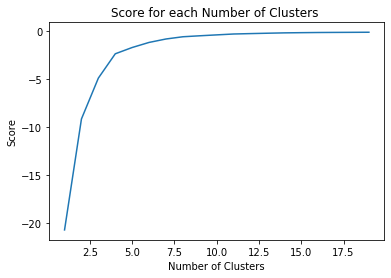

In [241]:
number_clusters = range(1, 20)
sklearn_pca = PCA(n_components = 2)
Y_sklearn = sklearn_pca.fit_transform(tf_idf_array)
kmeans = [KMeans(n_clusters=i, max_iter = 600) for i in number_clusters]
score = [kmeans[i].fit(Y_sklearn).score(Y_sklearn) for i in range(len(kmeans))]
plt.plot(number_clusters, score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Score for each Number of Clusters ')
plt.show()

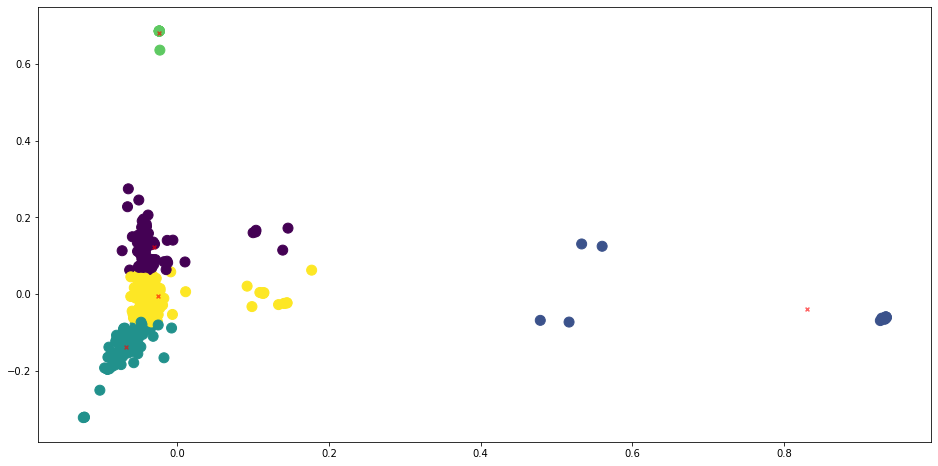

In [256]:
from sklearn.cluster import KMeans
sklearn_pca = PCA(n_components = 2)
Y_sklearn = sklearn_pca.fit_transform(tf_idf_array)
kmeans = KMeans(n_clusters=5, max_iter=600, algorithm = 'auto')
fitted = kmeans.fit(Y_sklearn)
prediction = kmeans.predict(Y_sklearn)
plt.figure(figsize=(16,8))
plt.scatter(Y_sklearn[:, 0], Y_sklearn[:, 1], c=prediction, s=100, cmap='viridis')
centers = fitted.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1],c='red', s=15, alpha=0.6, marker = 'x')

In [257]:
def get_top_features_cluster(tf_idf_array, prediction, n_feats):
    labels = np.unique(prediction)
    dfs = []
    for label in labels:
        id_temp = np.where(prediction==label) # indices for each cluster
        x_means = np.mean(tf_idf_array[id_temp], axis = 0) # returns average score across cluster
        sorted_means = np.argsort(x_means)[::-1][:n_feats] # indices with top 20 scores
        features = tf_idf_vectorizor.get_feature_names()
        best_features = [(features[i], x_means[i]) for i in sorted_means]
        df = pd.DataFrame(best_features, columns = ['features', 'score'])
        dfs.append(df)
    return dfs
dfs = get_top_features_cluster(tf_idf_array, prediction, 20)

In [258]:
for df in dfs:
    print(list(df['features']))

['https', 'black', 'woman', 'skincare', 'owned', 'com', 'products', 'amp', 'jpg', 'line', 'imgur', 'company', 'vietnam', 'prettylittlething', 'entrepreneur', 'lovely', 'luxury', 'cute', 'business', 'vegan']
['bn', 'fs', 'available', '10', 'jpg', 'imgur', 'lip', 'oz', 'com', 'lipstick', 'ds', 'cream', 'primer', 'palette', 'dermalogica', 'spray', '1oz', 'benefit', 'eye', 'mini']
['just', 'like', 'skin', 'don', 've', 'look', 'women', 'want', 'time', 'know', 'really', 'people', 'feel', 'face', 'make', 'men', 'good', 'things', 'didn', 'think']
['aromatherapy', 'specialize', 'dallas', 'spreading', 'awareness', 'operated', 'serving', 'fczpetxevs', 'local', 'community', 'https', 'owned', 'thank', 'business', 'available', 'family', 'years', '10', 'products', 'black']
['skincare', 'woman', 'skin', 'rv', 'https', 'routine', 'ml', 'products', 'new', 'black', 'cream', 'beautiful', 'oz', 'beauty', 'face', 'like', 'brand', 'care', 've', 'makeup']


In [ ]:
# customer segment
# 0: women who own a business and would like to buy luxury skincare products
# 1: women who focus on detailed skincare to create perfect skin
# 2: women who want their face look good in front of other people
# 3: women who need special treatment in their skincare process
# 4: women who have a skincare routine everyday

In [259]:
new_df = pd.concat([reddit_df,unique_tweet_df])
new_df.reset_index(drop = True, inplace = True)
new_df['segment'] = prediction
new_df.reset_index(inplace = True, drop = True)

In [261]:
new_df

,title,body,subreddit description,text,date,description,segment
0,[FOUND] Skincare Show & Tell - Back from the h...,I am catching up with all the content I missed...,A place for lovers of Asian beauty and skincar...,[FOUND] Skincare Show & Tell - Back from the h...,NaN,NaN,0
1,"Idpol Capitalism UK: Woman says ""I'm black, fe...",,Subreddit primarily focused on critiquing iden...,"Idpol Capitalism UK: Woman says ""I'm black, fe...",NaN,NaN,4
2,Skincare recommendations for older woman with ...,So this post is on behalf of my Mum (55f) who ...,,Skincare recommendations for older woman with ...,NaN,NaN,2
3,Chandigarh Woman Starts Skincare Brand From Ho...,,This community is about promoting feminist ide...,Chandigarh Woman Starts Skincare Brand From Ho...,NaN,NaN,4
4,Closeup of a beautiful woman using a moisturiz...,Closeup of a beautiful woman using a moisturiz...,,Closeup of a beautiful woman using a moisturiz...,NaN,NaN,4
...,...,...,...,...,...,...,...
351,NaN,NaN,NaN,@jackieaina @MoussouBeauty is an all natural s...,Tue Jun 02 23:29:18 +0000 2020,All natural skincare dedicated to turning skin...,0
352,NaN,NaN,NaN,@nyjats @jadenhossler shea moisture a great co...,Tue Jun 02 22:38:05 +0000 2020,just a girl with a big fro living life,0
353,NaN,NaN,NaN,@Alythuh @JardimEscondido Black woman owned sk...,Tue Jun 02 22:12:30 +0000 2020,Scientist. Writer. Sherlockian. Mom. Wife. Mor...,0
354,NaN,NaN,NaN,Epara skincare is literally about enveloping y...,Tue Jun 02 21:31:17 +0000 2020,I'm extra af | UTSA21 | SC-yungxnaps713,0


In [262]:
new_df.groupby('segment').size()

segment
0     79
1     16
2    103
3      9
4    149
dtype: int64

In [269]:
black_df = pd.merge(black_reddit_df, unique_black_tweet_df, how='outer')
new_black_df = pd.merge(new_df, black_df, how='inner')
new_black_df

,title,body,subreddit description,text,date,description,segment
0,"Idpol Capitalism UK: Woman says ""I'm black, fe...",,Subreddit primarily focused on critiquing iden...,"Idpol Capitalism UK: Woman says ""I'm black, fe...",NaN,NaN,4
1,"Capitalist identity politics UK: Woman says ""I...",,"Don't ask questions, just consume product and ...","Capitalist identity politics UK: Woman says ""I...",NaN,NaN,4
2,As often as you may hear it white men really d...,A post that’s more slightly more laid back but...,This is a place to openly discuss and celebrat...,As often as you may hear it white men really d...,NaN,NaN,4
3,June 3rd Protest and Riot Discussion/Update th...,Thank you to the [/r/LosAngeles](https://old.r...,"The official subreddit of Los Angeles, Califor...",June 3rd Protest and Riot Discussion/Update th...,NaN,NaN,0
4,"[Sell][US to World] Inglot, Burberry Cat Lash,...","Happy New Year! I am an experienced seller, bo...",Welcome back to MUE! Please make sure to read ...,"[Sell][US to World] Inglot, Burberry Cat Lash,...",NaN,NaN,1
...,...,...,...,...,...,...,...
105,NaN,NaN,NaN,@jackieaina @MoussouBeauty is an all natural s...,Tue Jun 02 23:29:18 +0000 2020,All natural skincare dedicated to turning skin...,0
106,NaN,NaN,NaN,@nyjats @jadenhossler shea moisture a great co...,Tue Jun 02 22:38:05 +0000 2020,just a girl with a big fro living life,0
107,NaN,NaN,NaN,@Alythuh @JardimEscondido Black woman owned sk...,Tue Jun 02 22:12:30 +0000 2020,Scientist. Writer. Sherlockian. Mom. Wife. Mor...,0
108,NaN,NaN,NaN,Epara skincare is literally about enveloping y...,Tue Jun 02 21:31:17 +0000 2020,I'm extra af | UTSA21 | SC-yungxnaps713,0


In [360]:
new_black_df['type'] = 'Black'
new_df_0 = pd.merge(new_df,new_black_df,how = 'outer')
for i in range(len(new_df_0)):
    if new_df_0['type'].iloc[i] != 'Black':
        new_df_0['type'].iloc[i] = 'Non_Black'
new_df_0['count'] = 1
new_df_0['percent'] = 100/len(new_df_0)
new_df_0['percent_b'] = np.where(new_df_0['type'] == 'Black', 100/len(new_df_0[new_df_0['type'] == 'Black']), 100/len(new_df_0[new_df_0['type'] != 'Black']))

/Applications/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [361]:
new_df_0 = new_df_0[(new_df_0['type'] != 'Non_Black') | (new_df_0['segment'] != 1)]

In [362]:
new_df_0.reset_index(inplace = True, drop = True)

In [363]:
new_df_0

,title,body,subreddit description,text,date,description,segment,type,count,percent,percent_b
0,[FOUND] Skincare Show & Tell - Back from the h...,I am catching up with all the content I missed...,A place for lovers of Asian beauty and skincar...,[FOUND] Skincare Show & Tell - Back from the h...,NaN,NaN,0,Non_Black,1,0.280899,0.406504
1,"Idpol Capitalism UK: Woman says ""I'm black, fe...",,Subreddit primarily focused on critiquing iden...,"Idpol Capitalism UK: Woman says ""I'm black, fe...",NaN,NaN,4,Black,1,0.280899,0.909091
2,Skincare recommendations for older woman with ...,So this post is on behalf of my Mum (55f) who ...,,Skincare recommendations for older woman with ...,NaN,NaN,2,Non_Black,1,0.280899,0.406504
3,Chandigarh Woman Starts Skincare Brand From Ho...,,This community is about promoting feminist ide...,Chandigarh Woman Starts Skincare Brand From Ho...,NaN,NaN,4,Non_Black,1,0.280899,0.406504
4,Closeup of a beautiful woman using a moisturiz...,Closeup of a beautiful woman using a moisturiz...,,Closeup of a beautiful woman using a moisturiz...,NaN,NaN,4,Non_Black,1,0.280899,0.406504
...,...,...,...,...,...,...,...,...,...,...,...
350,NaN,NaN,NaN,@jackieaina @MoussouBeauty is an all natural s...,Tue Jun 02 23:29:18 +0000 2020,All natural skincare dedicated to turning skin...,0,Black,1,0.280899,0.909091
351,NaN,NaN,NaN,@nyjats @jadenhossler shea moisture a great co...,Tue Jun 02 22:38:05 +0000 2020,just a girl with a big fro living life,0,Black,1,0.280899,0.909091
352,NaN,NaN,NaN,@Alythuh @JardimEscondido Black woman owned sk...,Tue Jun 02 22:12:30 +0000 2020,Scientist. Writer. Sherlockian. Mom. Wife. Mor...,0,Black,1,0.280899,0.909091
353,NaN,NaN,NaN,Epara skincare is literally about enveloping y...,Tue Jun 02 21:31:17 +0000 2020,I'm extra af | UTSA21 | SC-yungxnaps713,0,Black,1,0.280899,0.909091


In [364]:
architype = []
for i in range(len(new_df_0)):
    if new_df_0['segment'].iloc[i] == 0:
        architype.append('women who own a business and would like to buy luxury skincare products')
    elif new_df_0['segment'].iloc[i] == 1:
        architype.append('women who focus on detailed skincare to create perfect skin')
    elif new_df_0['segment'].iloc[i] == 2:
        architype.append('women who want their face look good in front of other people')
    elif new_df_0['segment'].iloc[i] == 3:
        architype.append('women who need special treatment in their skincare process')
    else:
        architype.append('women who have a skincare routine everyday')
new_df_0['architype'] = architype

In [449]:
# cluster all skincare
data = data_all_text
tf_idf_vectorizor = TfidfVectorizer(stop_words = 'english', max_features = 20000)
tf_idf = tf_idf_vectorizor.fit_transform(data)
tf_idf_norm = normalize(tf_idf)
tf_idf_array = tf_idf_norm.toarray()

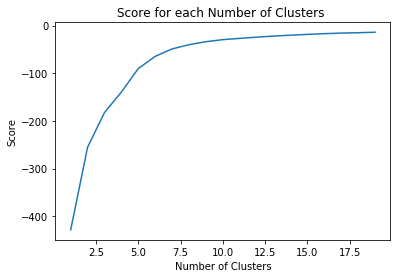

In [450]:
number_clusters = range(1, 20)
sklearn_pca = PCA(n_components = 2)
Y_sklearn = sklearn_pca.fit_transform(tf_idf_array)
kmeans = [KMeans(n_clusters=i, max_iter = 600) for i in number_clusters]
score = [kmeans[i].fit(Y_sklearn).score(Y_sklearn) for i in range(len(kmeans))]
plt.plot(number_clusters, score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Score for each Number of Clusters ')
plt.show()

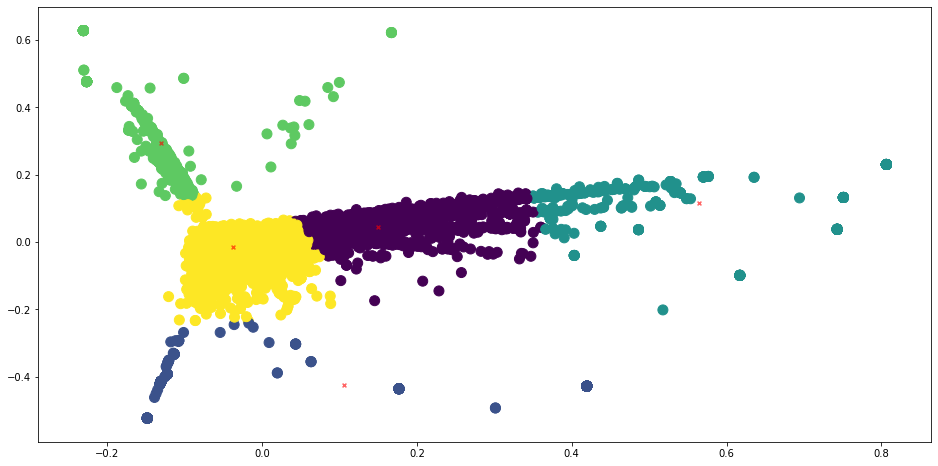

In [471]:
from sklearn.cluster import KMeans
sklearn_pca = PCA(n_components = 2)
Y_sklearn = sklearn_pca.fit_transform(tf_idf_array)
kmeans = KMeans(n_clusters=5, max_iter=600, algorithm = 'auto')
fitted = kmeans.fit(Y_sklearn)
prediction = kmeans.predict(Y_sklearn)
plt.figure(figsize=(16,8))
plt.scatter(Y_sklearn[:, 0], Y_sklearn[:, 1], c=prediction, s=100, cmap='viridis')
centers = fitted.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1],c='red', s=15, alpha=0.6, marker = 'x')

In [472]:
dfs_all = get_top_features_cluster(tf_idf_array, prediction, 25)

In [473]:
for df in dfs_all:
    print(list(df['features']))

['routine', 'skincare', 'drop', 'https', 'need', 'ur', 'pls', 'skin', 'doing', 'night', 'like', 'new', 'just', 'sis', 'time', 'don', 'morning', 'know', 'step', 'good', 'share', 'tell', 'really', 'im', 'did']
['skincare', 'beauty', 'https', 'eqwcoehctc', 'paris', 'house', 'products', 'shop', 'natural', 'handcrafted', 'lashes', 'choose', 'beautiful', 'eqwcoezdla', 'support', 'best', 'new', 'organic', 'turmeric', 'wqvsl0mcet', 'y8taerzz8c', 'z2r2ixtd98', 'yqmbuxnd5y', 'pdm7maxz2y', 'nialofficial28']
['routine', 'drop', 'skincare', 'https', 'pls', 'sis', 'ur', 'need', 'king', 'sir', 'omg', 'needs', 'ma', 'queen', 'want', 'bts_twt', 'cravity_twt', 'ta', 'yoongi', 'shy', 'glowing', 'flawless', 'don', 'good', 'sha']
['skincare_idn', 'nder', 'tagg', 'https', 'tag', 'dong', 'shopee', 'nitip', 'link', 'donee', 'ada', 'drop', 'spill', 'doneee', 'dm', 'toner', 'nitipp', 'thank', 'exfo', 'min', 'sold', 'new', 'wardah', 'cleansing', 'emina']
['skincare', 'https', 'skin', 'products', 'beauty', 'just'

In [ ]:
# female architype
# 0: sage woman - have a fixed skincare routine everyday both in the morning and night
# 1: comfortable woman - prefer natural and additive-free skincare products, prefer natural beauty
# 2: graceful woman - behave with dignity and elegance，pursuit of perfect skin
# 3: casual woman - don't care much about skincare, use cosmetics recommended by shop staff or sent by others
# 4: attractive woman - focus on make-up while skincare to make themselves look pretty

In [578]:
new_df_all = pd.concat([reddit_df,unique_all_tweet_woman])
new_df_all.reset_index(drop = True, inplace = True)
new_df_all['segment'] = prediction
new_df_all.reset_index(inplace = True, drop = True)

In [579]:
new_df_all.groupby('segment').size()

segment
0     1863
1      405
2      370
3      714
4    11843
dtype: int64

In [580]:
new_df_all_black = new_df_all[new_df_all['black'] == 1]
new_df_all_black.reset_index(drop = True, inplace = True)
new_df_all_black

,title,body,subreddit description,text,date,description,man,black,segment
0,NaN,NaN,NaN,@ggukgutz my friend did the same thing and it ...,Thu Jun 11 04:53:27 +0000 2020,,0.0,1.0,4
1,NaN,NaN,NaN,Bid your goodbyes to Blackheads !!\n.\n#peelof...,Thu Jun 11 04:30:46 +0000 2020,Matra is a dream of a nature lover to help enh...,0.0,1.0,4
2,NaN,NaN,NaN,favorite black skincare brand right now is @BA...,Thu Jun 11 04:14:36 +0000 2020,freelance writer | costume designer | curated ...,0.0,1.0,4
3,NaN,NaN,NaN,Here's a good master list that features Black ...,Thu Jun 11 04:07:40 +0000 2020,They/Faye & She/He (A Plural Gang)\nAutistic/B...,0.0,1.0,4
4,NaN,NaN,NaN,if I start a bath &amp; body/skincare/haircare...,Thu Jun 11 03:35:03 +0000 2020,keep your karma sweet,0.0,1.0,4
...,...,...,...,...,...,...,...,...,...
532,NaN,NaN,NaN,This is one of my favorite skincare brands of ...,Sun Jun 07 17:20:08 +0000 2020,I never promised to be cool 💯she/her,0.0,1.0,4
533,NaN,NaN,NaN,@IamMthuGomo The Jack Black Eye Balm De-puffin...,Sun Jun 07 17:14:31 +0000 2020,Introvert || Lover of life || Skincare Junkie ...,0.0,1.0,4
534,NaN,NaN,NaN,their skincare routines be like:\n\nblack soap...,Sun Jun 07 17:10:24 +0000 2020,i model n stuff | ig: imaripoza,0.0,1.0,4
535,NaN,NaN,NaN,Shop with Kaleb’s Krown now at https://t.co/0h...,Sun Jun 07 17:02:26 +0000 2020,Official account of Kaleb’s Krown Hair and Ski...,0.0,1.0,4


In [581]:
new_df_all_black.groupby('segment').size()

segment
0     11
1      2
3      1
4    523
dtype: int64

In [582]:
new_df_all['count'] = 1
architype = []
architype_explanation = []
for i in range(len(new_df_all)):
    if new_df_all['segment'].iloc[i] == 0:
        architype.append('sage woman')
        architype_explanation.append('sage woman - have a fixed skincare routine everyday both in the morning and night')
    elif new_df_all['segment'].iloc[i] == 1:
        architype.append('comfortable woman')
        architype_explanation.append('comfortable woman - prefer natural and additive-free skincare products, prefer natural beauty')
    elif new_df_all['segment'].iloc[i] == 2:
        architype.append('graceful woman')
        architype_explanation.append('graceful woman - behave with dignity and elegance，pursuit of perfect skin')
    elif new_df_all['segment'].iloc[i] == 3:
        architype.append('casual woman')
        architype_explanation.append("casual woman - don't care much about skincare, use cosmetics recommended by shop staff or sent by others")
    else:
        architype.append('attractive woman')
        architype_explanation.append("attractive woman - focus on make-up while skincare to make themselves look pretty")
new_df_all['architype'] = architype
new_df_all['architype_explanation'] = architype_explanation

In [583]:
black_reddit_df['type'] = 'Black'
black_reddit_df

,title,body,subreddit description,text,type
0,"Idpol Capitalism UK: Woman says ""I'm black, fe...",,Subreddit primarily focused on critiquing iden...,"Idpol Capitalism UK: Woman says ""I'm black, fe...",Black
1,"Capitalist identity politics UK: Woman says ""I...",,"Don't ask questions, just consume product and ...","Capitalist identity politics UK: Woman says ""I...",Black
2,As often as you may hear it white men really d...,A post that’s more slightly more laid back but...,This is a place to openly discuss and celebrat...,As often as you may hear it white men really d...,Black
3,June 3rd Protest and Riot Discussion/Update th...,Thank you to the [/r/LosAngeles](https://old.r...,"The official subreddit of Los Angeles, Califor...",June 3rd Protest and Riot Discussion/Update th...,Black
4,"[Sell][US to World] Inglot, Burberry Cat Lash,...","Happy New Year! I am an experienced seller, bo...",Welcome back to MUE! Please make sure to read ...,"[Sell][US to World] Inglot, Burberry Cat Lash,...",Black
...,...,...,...,...,...
56,"[US/Sell] Offers welcome! Kate Somerville, Est...",Shipping starts at $3 and goes up based on wei...,An exchange place for all of your skincare pro...,"[US/Sell] Offers welcome! Kate Somerville, Est...",Black
57,[SELL] [US -> INT] Hundreds of items: Mostly a...,Hello! Thank you for checking out my thread :)...,Welcome back to MUE! Please make sure to read ...,[SELL] [US -> INT] Hundreds of items: Mostly a...,Black
58,[SELL] [US ➣ THE ENTIRE UNIVERSE] NEW ITEMS AD...,"On today's episode of ""My Strange Addiction"" w...",Welcome back to MUE! Please make sure to read ...,[SELL] [US ➣ THE ENTIRE UNIVERSE] NEW ITEMS AD...,Black
59,[SELL][US TO ANYWHERE] New items added! PMG Ey...,"**DETAILS**\n\n\- If you don't like a price, f...",Welcome back to MUE! Please make sure to read ...,[SELL][US TO ANYWHERE] New items added! PMG Ey...,Black


In [584]:
new_df_all = new_df_all.merge(black_reddit_df, how = 'outer')
for i in range(len(new_df_all)):
    if new_df_all['black'].iloc[i] == 1:
        new_df_all.loc[i,'type'] = "Black"
new_df_all['type'] = np.where(new_df_all['type'].isnull(),"Non_Black","Black")     
new_df_all

,title,body,subreddit description,text,date,description,man,black,segment,count,architype,architype_explanation,type
0,[FOUND] Skincare Show & Tell - Back from the h...,I am catching up with all the content I missed...,A place for lovers of Asian beauty and skincar...,[FOUND] Skincare Show & Tell - Back from the h...,NaN,NaN,NaN,NaN,4,1,attractive woman,attractive woman - focus on make-up while skin...,Non_Black
1,"Idpol Capitalism UK: Woman says ""I'm black, fe...",,Subreddit primarily focused on critiquing iden...,"Idpol Capitalism UK: Woman says ""I'm black, fe...",NaN,NaN,NaN,NaN,4,1,attractive woman,attractive woman - focus on make-up while skin...,Black
2,Skincare recommendations for older woman with ...,So this post is on behalf of my Mum (55f) who ...,,Skincare recommendations for older woman with ...,NaN,NaN,NaN,NaN,4,1,attractive woman,attractive woman - focus on make-up while skin...,Non_Black
3,Chandigarh Woman Starts Skincare Brand From Ho...,,This community is about promoting feminist ide...,Chandigarh Woman Starts Skincare Brand From Ho...,NaN,NaN,NaN,NaN,4,1,attractive woman,attractive woman - focus on make-up while skin...,Non_Black
4,Closeup of a beautiful woman using a moisturiz...,Closeup of a beautiful woman using a moisturiz...,,Closeup of a beautiful woman using a moisturiz...,NaN,NaN,NaN,NaN,0,1,sage woman,sage woman - have a fixed skincare routine eve...,Non_Black
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15190,NaN,NaN,NaN,Skincare at 12:51 am. 💆🏻,Sun Jun 07 16:51:50 +0000 2020,Pabio po 🥺🤤,0.0,0.0,4,1,attractive woman,attractive woman - focus on make-up while skin...,Non_Black
15191,NaN,NaN,NaN,@skincare_idn Oh jelas BLP,Sun Jun 07 16:51:48 +0000 2020,Call me dibs \n✨❤️Use ➡️ SBN04EAC5 ⬅️ when CO ...,0.0,0.0,3,1,casual woman,"casual woman - don't care much about skincare,...",Non_Black
15192,NaN,NaN,NaN,Self-care is grabbing Starbucks in the morning...,Sun Jun 07 16:50:56 +0000 2020,Med student | Passionate about health equity |...,0.0,0.0,4,1,attractive woman,attractive woman - focus on make-up while skin...,Non_Black
15193,NaN,NaN,NaN,Adding rose water and GR into my skincare is t...,Sun Jun 07 16:49:57 +0000 2020,mundane,0.0,0.0,4,1,attractive woman,attractive woman - focus on make-up while skin...,Non_Black


In [405]:
# plot woman skincare
import plotly.express as px
fig = px.sunburst(new_df_0, path=['segment', 'type'], values = 'count', hover_name = 'architype', color = 'segment', branchvalues = 'total')
fig.update_layout(showlegend=True)
fig.show()

In [399]:
px.sunburst?

In [404]:
import plotly.express as px
fig = px.sunburst(new_df_0, path=['type', 'segment'], values = 'count', hover_name = 'architype', color = 'type')
#fig.update_layout(showlegend=True)
fig.show()

In [396]:
import plotly.express as px
fig = px.pie(new_df_0, values='count', names='architype', title='Architype percentage for all people')
fig.update_layout(legend_orientation="h")
fig.show()

In [376]:
new_df_black = new_df_0[new_df_0['type'] == 'Black']

In [377]:
new_df_black

,title,body,subreddit description,text,date,description,segment,type,count,percent,percent_b,architype
1,"Idpol Capitalism UK: Woman says ""I'm black, fe...",,Subreddit primarily focused on critiquing iden...,"Idpol Capitalism UK: Woman says ""I'm black, fe...",NaN,NaN,4,Black,1,0.280899,0.909091,women who have a skincare routine everyday
7,"Capitalist identity politics UK: Woman says ""I...",,"Don't ask questions, just consume product and ...","Capitalist identity politics UK: Woman says ""I...",NaN,NaN,4,Black,1,0.280899,0.909091,women who have a skincare routine everyday
18,As often as you may hear it white men really d...,A post that’s more slightly more laid back but...,This is a place to openly discuss and celebrat...,As often as you may hear it white men really d...,NaN,NaN,4,Black,1,0.280899,0.909091,women who have a skincare routine everyday
20,June 3rd Protest and Riot Discussion/Update th...,Thank you to the [/r/LosAngeles](https://old.r...,"The official subreddit of Los Angeles, Califor...",June 3rd Protest and Riot Discussion/Update th...,NaN,NaN,0,Black,1,0.280899,0.909091,women who own a business and would like to buy...
23,"[Sell][US to World] Inglot, Burberry Cat Lash,...","Happy New Year! I am an experienced seller, bo...",Welcome back to MUE! Please make sure to read ...,"[Sell][US to World] Inglot, Burberry Cat Lash,...",NaN,NaN,1,Black,1,0.280899,0.909091,women who focus on detailed skincare to create...
...,...,...,...,...,...,...,...,...,...,...,...,...
350,NaN,NaN,NaN,@jackieaina @MoussouBeauty is an all natural s...,Tue Jun 02 23:29:18 +0000 2020,All natural skincare dedicated to turning skin...,0,Black,1,0.280899,0.909091,women who own a business and would like to buy...
351,NaN,NaN,NaN,@nyjats @jadenhossler shea moisture a great co...,Tue Jun 02 22:38:05 +0000 2020,just a girl with a big fro living life,0,Black,1,0.280899,0.909091,women who own a business and would like to buy...
352,NaN,NaN,NaN,@Alythuh @JardimEscondido Black woman owned sk...,Tue Jun 02 22:12:30 +0000 2020,Scientist. Writer. Sherlockian. Mom. Wife. Mor...,0,Black,1,0.280899,0.909091,women who own a business and would like to buy...
353,NaN,NaN,NaN,Epara skincare is literally about enveloping y...,Tue Jun 02 21:31:17 +0000 2020,I'm extra af | UTSA21 | SC-yungxnaps713,0,Black,1,0.280899,0.909091,women who own a business and would like to buy...


In [395]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
# Create subplots: use 'domain' type for Pie subplot
fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]])
fig.add_trace(go.Pie(labels=new_df_0['architype'], values=new_df_0['count'], name="All woman"),
              1, 1)
fig.add_trace(go.Pie(labels=new_df_black['architype'], values=new_df_black['count'], name="Black woman"),
              1, 2)

# Use `hole` to create a donut-like pie chart
fig.update_traces(hole=.4, hoverinfo="label+percent+name+value")

fig.update_layout(
    # Add annotations in the center of the donut pies.
    annotations=[dict(text='All', x=0.21, y=0.5, font_size=20, showarrow=False),
                 dict(text='Black', x=0.81, y=0.5, font_size=20, showarrow=False)],
    legend_title_text='Female Architypes',
    margin = dict(t=10, l=0, r=0, b=0),
    legend_orientation="h")
fig.show()

In [591]:
# plot all skincare
import plotly.express as px
fig = px.sunburst(new_df_all, path=['architype', 'type'], values = 'count', color = 'architype', branchvalues = 'total')
fig.update_layout(showlegend=True)
fig.show()

In [592]:
import plotly.express as px
fig = px.sunburst(new_df_all, path=['type', 'architype'], values = 'count', color = 'architype')
#fig.update_layout(showlegend=True)
fig.show()

In [594]:
new_df_all_black = new_df_all[new_df_all['type'] == 'Black']

In [595]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
# Create subplots: use 'domain' type for Pie subplot
fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]])
fig.add_trace(go.Pie(labels=new_df_all['architype_explanation'], values=new_df_0['count'], name="All woman"),
              1, 1)
fig.add_trace(go.Pie(labels=new_df_all_black['architype_explanation'], values=new_df_black['count'], name="Black woman"),
              1, 2)

# Use `hole` to create a donut-like pie chart
fig.update_traces(hole=.4, hoverinfo="label+percent+name+value")

fig.update_layout(
    # Add annotations in the center of the donut pies.
    annotations=[dict(text='All', x=0.21, y=0.5, font_size=20, showarrow=False),
                 dict(text='Black', x=0.81, y=0.5, font_size=20, showarrow=False)],
    legend_title_text='Female Architypes',
    margin = dict(t=10, l=0, r=0, b=0),
    legend_orientation="h")
fig.show()

In [249]:
# lda: result not good for woman skincare
def prepare_text(texts):
    for i in range(len(texts)):
        text = texts[i]
        sents = sent_tokenize(text)
        for j in range(len(sents)):
            sent = sents[j]
            sent = sent.strip().replace('\n','')
            sents[j] = sent
        texts[i] = '. '.join(sents)
    texts = [[word for word in text.lower().split()
        if word not in STOPWORDS and word.isalnum() and len(word) >= 3]
        for text in texts]
    return texts
def lda_func(texts, num_topics, passes):
    texts = prepare_text(texts)
    dictionary = corpora.Dictionary(texts)
    corpus = [dictionary.doc2bow(text) for text in texts]
    lda = LdaModel(corpus,
                  id2word=dictionary,
                  num_topics=num_topics,
                  passes=passes)
    return lda
texts = data_text
lda = lda_func(texts,5,50)
lda.print_topics(num_words=20)
# UPS_internal.reset_index(drop = True, inplace = True)
# for i in range(len(UPS_internal)):
#     if pd.notnull(UPS_internal['employee_title'].iloc[i]):
#         new_text = [nltk.word_tokenize(UPS_internal['employee_title'].iloc[i])]
#         dictionary = corpora.Dictionary(new_text)
#         corpus_new = [dictionary.doc2bow(text) for text in new_text]
#         from operator import itemgetter
#         UPS_internal.loc[i,'job_type'] = sorted(lda.get_document_topics(corpus_new[0],minimum_probability=0.05,per_word_topics=False))[0][0]

[(0,
  '0.010*"like" + 0.008*"lizardfolk" + 0.005*"know" + 0.005*"love" + 0.004*"think" + 0.004*"people" + 0.004*"want" + 0.003*"going" + 0.003*"king" + 0.003*"woman" + 0.003*"feel" + 0.003*"time" + 0.003*"look" + 0.003*"men" + 0.003*"need" + 0.003*"women" + 0.003*"good" + 0.002*"got" + 0.002*"little" + 0.002*"trying"'),
 (1,
  '0.011*"like" + 0.007*"mother" + 0.006*"want" + 0.006*"time" + 0.005*"feel" + 0.005*"know" + 0.005*"women" + 0.005*"felt" + 0.004*"entitled" + 0.003*"things" + 0.003*"work" + 0.003*"school" + 0.003*"hair" + 0.003*"got" + 0.003*"expect" + 0.003*"men" + 0.003*"told" + 0.003*"sister" + 0.003*"going" + 0.003*"little"'),
 (2,
  '0.015*"skincare" + 0.013*"skin" + 0.012*"woman" + 0.010*"like" + 0.006*"products" + 0.005*"face" + 0.005*"good" + 0.005*"time" + 0.005*"black" + 0.004*"look" + 0.004*"know" + 0.004*"makeup" + 0.004*"use" + 0.004*"want" + 0.004*"need" + 0.004*"think" + 0.004*"feel" + 0.004*"routine" + 0.004*"started" + 0.004*"care"'),
 (3,
  '0.033*"shade" + 0

In [467]:
texts = data_all_text
lda = lda_func(texts,5,50)
lda.print_topics(num_words=20)

[(0,
  '0.061*"skin" + 0.026*"skincare" + 0.014*"care" + 0.012*"products" + 0.011*"face" + 0.010*"use" + 0.008*"oil" + 0.007*"cream" + 0.006*"facial" + 0.006*"best" + 0.006*"serum" + 0.006*"natural" + 0.005*"cleanser" + 0.005*"vitamin" + 0.005*"dry" + 0.005*"mask" + 0.005*"toner" + 0.005*"dark" + 0.005*"treat" + 0.005*"organic"'),
 (1,
  '0.147*"skincare" + 0.054*"routine" + 0.021*"skin" + 0.018*"drop" + 0.013*"like" + 0.012*"need" + 0.008*"know" + 0.008*"good" + 0.006*"products" + 0.006*"face" + 0.006*"new" + 0.005*"help" + 0.005*"want" + 0.005*"time" + 0.005*"product" + 0.005*"use" + 0.005*"makeup" + 0.005*"look" + 0.004*"day" + 0.004*"thank"'),
 (2,
  '0.056*"skincare" + 0.022*"beauty" + 0.013*"products" + 0.011*"black" + 0.010*"natural" + 0.009*"shop" + 0.008*"like" + 0.008*"check" + 0.006*"love" + 0.006*"house" + 0.006*"owned" + 0.006*"face" + 0.006*"know" + 0.005*"body" + 0.005*"business" + 0.005*"paris" + 0.005*"want" + 0.005*"people" + 0.005*"organic" + 0.004*"brand"'),
 (3,
  